# Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/EMG_Features.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

## división de los datos.

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15))   # o n_components=0.95 si quieres 95% varianza
])

X_train_pca = pipeline_pca.fit_transform(X_train)
X_val_pca = pipeline_pca.transform(X_val)
X_test_pca = pipeline_pca.transform(X_test)



=== RESULTADOS DE VALIDACIÓN ===
   n_estimators  accuracy  precision    recall  f1_score
0             1  0.879227   0.884091  0.863485  0.873666
1             5  0.926999   0.940161  0.906770  0.923164
2            10  0.932367   0.961859  0.895671  0.927586
3            20  0.937735   0.962309  0.906770  0.933714
4            50  0.939882   0.962485  0.911210  0.936146
5           100  0.939882   0.963572  0.910100  0.936073
6           200  0.941492   0.963700  0.913430  0.937892
7           300  0.942029   0.963743  0.914539  0.938497


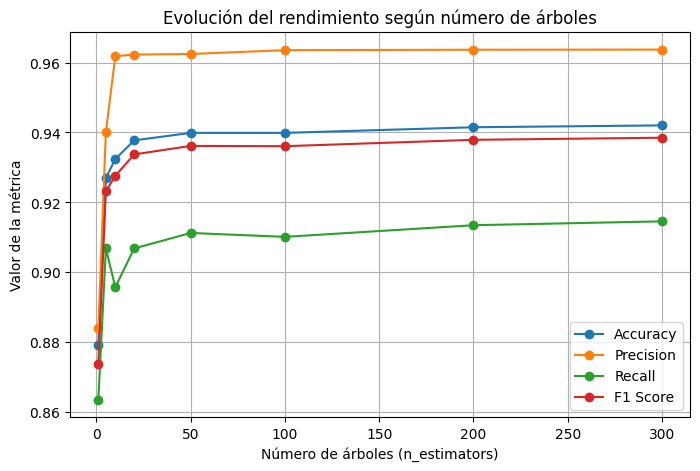

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Lista de números de árboles a probar
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300]

# Diccionario para guardar resultados
results = {
    "n_estimators": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

# Bucle de pruebas
for n in n_estimators_list:

    # Definir modelo con n árboles
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )

    # Entrenar
    model.fit(X_train_pca, y_train)

    # Predecir en validación
    y_val_pred = model.predict(X_val_pca)

    # Calcular métricas
    acc  = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val,y_val_pred)
    rec  = recall_score(y_val, y_val_pred)
    f1   = f1_score(y_val, y_val_pred)

    # Guardar resultados
    results["n_estimators"].append(n)
    results["accuracy"].append(acc)
    results["precision"].append(prec)
    results["recall"].append(rec)
    results["f1_score"].append(f1)

# Convertir a tabla
df_results = pd.DataFrame(results)
print("\n=== RESULTADOS DE VALIDACIÓN ===")
print(df_results)

# Graficar
plt.figure(figsize=(8, 5))

plt.plot(df_results["n_estimators"], df_results["accuracy"], marker='o', label="Accuracy")
plt.plot(df_results["n_estimators"], df_results["precision"], marker='o', label="Precision")
plt.plot(df_results["n_estimators"], df_results["recall"], marker='o', label="Recall")
plt.plot(df_results["n_estimators"], df_results["f1_score"], marker='o', label="F1 Score")

plt.title("Evolución del rendimiento según número de árboles")
plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Valor de la métrica")
plt.grid(True)
plt.legend()
plt.show()


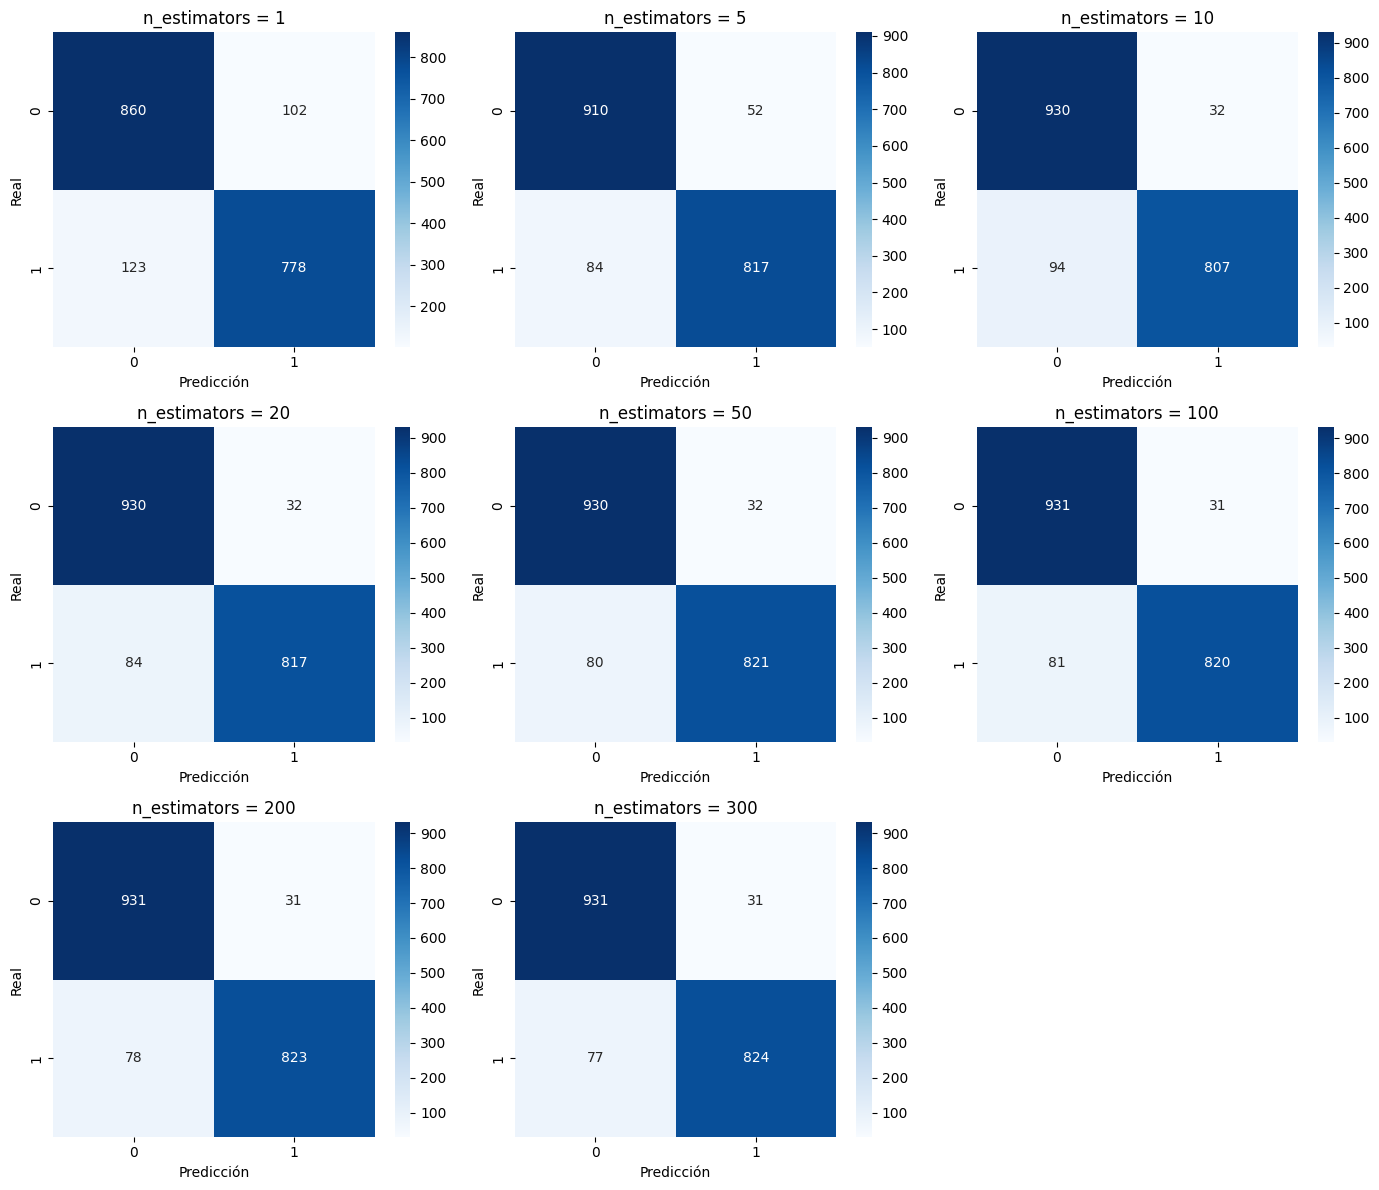

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de números de árboles a probar
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300]

# Guardamos resultados
confusion_results = {}

for n in n_estimators_list:

    # Definir modelo
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )

    # Entrenar
    model.fit(X_train_pca, y_train)

    # Predecir en validación
    y_val_pred = model.predict(X_val_pca)

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_val_pred)

    # Guardar matriz
    confusion_results[n] = cm


# =====================================================
#     MOSTRAR TODAS LAS MATRICES DE CONFUSIÓN
# =====================================================

num_models = len(n_estimators_list)
cols = 3
rows = (num_models + cols - 1) // cols

plt.figure(figsize=(14, 4 * rows))

for idx, n in enumerate(n_estimators_list):
    plt.subplot(rows, cols, idx + 1)
    sns.heatmap(confusion_results[n], annot=True, fmt='d', cmap='Blues')
    plt.title(f"n_estimators = {n}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")

plt.tight_layout()
plt.show()



--- TRAIN ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4495
         1.0       1.00      1.00      1.00      4197

    accuracy                           1.00      8692
   macro avg       1.00      1.00      1.00      8692
weighted avg       1.00      1.00      1.00      8692


--- VALIDACIÓN ---
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       962
         1.0       0.96      0.91      0.94       901

    accuracy                           0.94      1863
   macro avg       0.94      0.94      0.94      1863
weighted avg       0.94      0.94      0.94      1863


--- TEST ---
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       924
         1.0       0.97      0.90      0.93       939

    accuracy                           0.94      1863
   macro avg       0.94      0.94      0.94      1863
weighted avg       0.94  

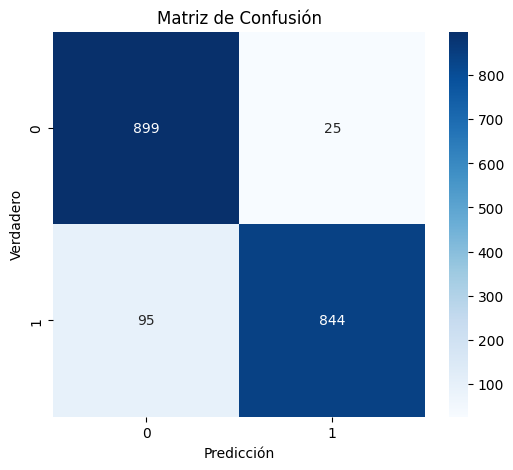

In [67]:
## entrenamiento con 200 árboles
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_pca, y_train)

pred_val = model.predict(X_val_pca)
pred_test = model.predict(X_test_pca)
pred_train= model.predict(X_train_pca)

## Métricas del modelo
print("\n--- TRAIN ---")
print(classification_report(y_train, pred_train))

print("\n--- VALIDACIÓN ---")
print(classification_report(y_val, pred_val))

print("\n--- TEST ---")
print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)

# Dibujar heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

